In [9]:
import os
import pathlib
import sys

HOME = os.environ.get('HOME', None)
PATH = os.environ.get('PATH', None)
PWD = os.environ.get('PWD', None)

%env PDK_ROOT={HOME}/tools/share/pdk
%env PDK=sky130A
%env STD_CELL_LIBRARY=sky130_fd_sc_hd
%env STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
%env OPENLANE_LOCAL_INSTALL=1
%env PATH={PATH}:{PWD}/OpenLane:{PWD}/OpenLane/scripts


env: PDK_ROOT=/home/monib/tools/share/pdk
env: PDK=sky130A
env: STD_CELL_LIBRARY=sky130_fd_sc_hd
env: STD_CELL_LIBRARY_OPT=sky130_fd_sc_hd
env: OPENLANE_LOCAL_INSTALL=1
env: PATH=/home/monib/miniconda3/bin:/home/monib/miniconda3/condabin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/usr/lib/wsl/lib:/mnt/c/Windows/system32:/mnt/c/Windows:/mnt/c/Windows/System32/Wbem:/mnt/c/Windows/System32/WindowsPowerShell/v1.0:/mnt/c/Windows/System32/OpenSSH:/mnt/c/Program Files/MATLAB/R2022a/bin:/mnt/c/Program Files (x86)/NVIDIA Corporation/PhysX/Common:/mnt/c/Program Files/Docker/Docker/resources/bin:/mnt/c/ProgramData/DockerDesktop/version-bin:/mnt/c/Users/Monib Ahmed/AppData/Local/Microsoft/WindowsApps:/snap/bin:/home/monib/eda-toolchain/notebooks/OpenLane:/home/monib/eda-toolchain/notebooks/OpenLane/scripts:/home/monib/eda-toolchain/OpenLane:/home/monib/eda-toolchain/OpenLane/scripts:/home/monib/eda-toolchain/OpenLane:/home/monib/eda-toolchain/OpenLane/

In [10]:
%%writefile inverter.v
module inverter(input wire in, output wire out, input clk, input rst_b);
    always_ff @(posedge clk)
      if (!rst_b) out <= 1'b0;
      else        out <= !in;
endmodule

Overwriting inverter.v


In [11]:
%%writefile config.tcl
set ::env(DESIGN_NAME) inverter
set ::env(VERILOG_FILES) "inverter.v"
set ::env(CLOCK_TREE_SYNTH) 1
set ::env(CLOCK_PORT) "clk"
set ::env(PL_RANDOM_GLB_PLACEMENT) 1
set ::env(FP_SIZING) absolute
set ::env(DIE_AREA) "0 0 50 50"
set ::env(PL_TARGET_DENSITY) 0.80
set ::env(FP_PDN_HORIZONTAL_HALO) 6
set ::env(FP_PDN_VERTICAL_HALO) 6
set ::env(DIODE_INSERTION_STRATEGY) 3

# disable version checks because we use conda packaged versions
set ::env(TEST_MISMATCHES) none


Overwriting config.tcl


In [13]:
!flow.tcl -design .

OpenLane 94521291e39eb5895aceb059b655cd2532d5564b
All rights reserved. (c) 2020-2022 Efabless Corporation and contributors.
Available under the Apache License, version 2.0. See the LICENSE file for more details.

[INFO]: Using configuration in 'config.tcl'...
[INFO]: PDK Root: /home/monib/tools/share/pdk
[INFO]: Process Design Kit: sky130A
couldn't read file "/home/monib/tools/share/pdk/sky130A/libs.tech/openlane/config.tcl": no such file or directory
    while executing
"source $pdk_config"
    (procedure "prep" line 142)
    invoked from within
"prep {*}$args"
    (procedure "run_non_interactive_mode" line 12)
    invoked from within
"run_non_interactive_mode {*}$argv"
    invoked from within
"if { [info exists flags_map(-interactive)] || [info exists flags_map(-it)] } {
    if { [info exists arg_values(-file)] } {
        run_file [file nor..."
    (file "/home/monib/eda-toolchain/OpenLane/flow.tcl" line 401)


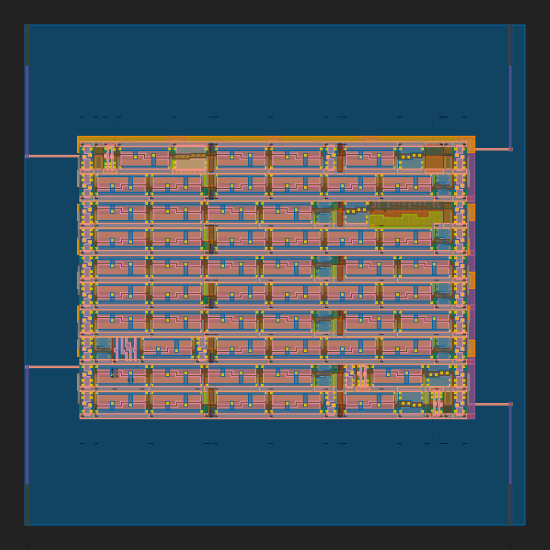

In [10]:
import pathlib
import gdstk
import IPython.display

gdss = sorted(pathlib.Path('runs').glob('*/results/final/gds/*.gds'))
library = gdstk.read_gds(gdss[-1])
top_cells = library.top_level()
top_cells[0].write_svg('inverter.svg')
IPython.display.SVG('inverter.svg')

In [23]:
%%writefile test_inv.spice
**.subckt test_inv
C1 Z[1] 0 4f m=1
C2 Z[2] 0 4f m=1
C3 Z[3] 0 4f m=1
C4 Z[4] 0 4f m=1
C5 Z[5] 0 4f m=1
C6 Z[6] 0 4f m=1
C7 Z[0] 0 4.01f m=1
C8 Y[1] 0 4f m=1
C9 Y[2] 0 4f m=1
C10 Y[3] 0 4f m=1
C11 Y[4] 0 4f m=1
C12 Y[5] 0 4f m=1
C13 Y[6] 0 4f m=1
C14 Y[0] 0 4.01f m=1
x4 Z[1] Z[0] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x1 Z[2] Z[1] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x2 Z[3] Z[2] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x3 Z[4] Z[3] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x5 Z[5] Z[4] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x6 Z[6] Z[5] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x7 Z[0] Z[6] VCC VSS not W_N=1 L_N=0.15 W_P=2 L_P=0.15 m=1
x8 Y[0] Y[1] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
x9 Y[1] Y[2] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
x10 Y[2] Y[3] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
x11 Y[3] Y[4] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
x12 Y[4] Y[5] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
x13 Y[5] Y[6] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
x14 Y[6] Y[0] VCC VSS lvtnot W_N=1 L_N=0.15 W_P=2 L_P=0.35 m=1
**** begin user architecture code


vvss vss 0 dc 0
vvcc vcc 0 pwl 0 0 10n 0 10.1n 1.8 20n 1.8 20.1n 0
**** interactive sim
*.control
*save all
*tran 0.01n 30n
*plot "z[2]" "z[3]" "z[4]"
*plot "y[2]" "y[3]" "y[4]"
*write test_inv.raw
*.endc
**** batch mode sim
.tran 0.01n 30n
.save all


** opencircuitdesign pdks install
.lib /home/mariowei/tools/share/pdk/sky130A/libs.tech/ngspice/sky130.lib.spice tt


**** end user architecture code
**.ends

* expanding   symbol:  sky130_tests/not.sym # of pins=2
** sym_path: /home/mariowei/tools/share/pdk/sky130A/libs.tech/xschem/sky130_tests/not.sym
** sch_path: /home/mariowei/tools/share/pdk/sky130A/libs.tech/xschem/sky130_tests/not.sch
.subckt not y a  VCCPIN  VSSPIN      W_N=1 L_N=0.15 W_P=2 L_P=0.15
*.opin y
*.ipin a
XM1 y a VSSPIN VSSPIN sky130_fd_pr__nfet_01v8 L=L_N W=W_N nf=1 ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0 mult=1 m=1
XM2 y a VCCPIN VCCPIN sky130_fd_pr__pfet_01v8 L=L_P W=W_P nf=1 ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0 mult=1 m=1
.ends


* expanding   symbol:  sky130_tests/lvtnot.sym # of pins=2
** sym_path: /home/mariowei/tools/share/pdk/sky130A/libs.tech/xschem/sky130_tests/lvtnot.sym
** sch_path: /home/mariowei/tools/share/pdk/sky130A/libs.tech/xschem/sky130_tests/lvtnot.sch
.subckt lvtnot a y  VCCPIN  VSSPIN      W_N=1 L_N=0.15 W_P=2 L_P=0.35
*.opin y
*.ipin a
XM2 y a VCCPIN VCCPIN sky130_fd_pr__pfet_01v8_lvt L=L_P W=W_P nf=1 ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0 mult=1 m=1
XM1 y a VSSPIN VSSPIN sky130_fd_pr__nfet_01v8_lvt L=L_N W=W_N nf=1 ad='int((nf+1)/2) * W/nf * 0.29' as='int((nf+2)/2) * W/nf * 0.29'
+ pd='2*int((nf+1)/2) * (W/nf + 0.29)' ps='2*int((nf+2)/2) * (W/nf + 0.29)' nrd='0.29 / W' nrs='0.29 / W'
+ sa=0 sb=0 sd=0 mult=1 m=1
.ends

.end


Overwriting test_inv.spice


In [24]:
!ngspice -b -r test_inv.raw -i test_inv.spice


No compatibility mode selected!


Circuit: **.subckt test_inv

binary raw file "test_inv.raw"
Doing analysis at TEMP = 27.000000 and TNOM = 27.000000

No. of Data Columns : 103  

Initial Transient Solution
--------------------------

Node                                   Voltage
----                                   -------
z[1]                               9.50884e-19
z[2]                               8.32421e-18
z[3]                                7.1542e-19
z[4]                               6.28413e-18
z[5]                               5.00093e-18
z[6]                               2.07794e-18
z[0]                              -1.23964e-19
y[1]                              -2.89771e-18
y[2]                               4.14267e-18
y[3]                              -3.76705e-19
y[4]                               5.54543e-18
y[5]                              -1.57335e-18
y[6]                               1.30878e-17
y[0]                              -6.11803e-18
vss         